# Import Necessary Modules

In [83]:
import pandas as pd
import numpy as np

# Load Train and Test Data

In [84]:
train=pd.read_csv("C:/UTD Summer Semester/August/Python/train.csv")

# Summary of Train Data

In [85]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Check Data Types

In [86]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Check structure of data

In [87]:
print(train.shape)

(550068, 12)


# No of missing values 

In [88]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Percentage of missing values 

In [89]:
train.isnull().sum()/len(train)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

Approximately 70 % of the observations in the feature Product_Category_3 is missing or having Null Values. So Imputing this feature is not good idea. However Product Category 2 is having approximately 30% of observations as missing values in train. So drop Product Category 3 in train  and impute Product Category 2 in train

# Drop Product Category 3 in Train and Test

In [90]:
train.drop('Product_Category_3',axis=1,inplace=True)

In [91]:
print(train.shape)

(550068, 11)


Let's check the summary statistics 

In [92]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


In [93]:
import seaborn as sns

Factor Plots distribution of Each Categorical Variables in Train and Test Data

# Gender

C:\Users\karth\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


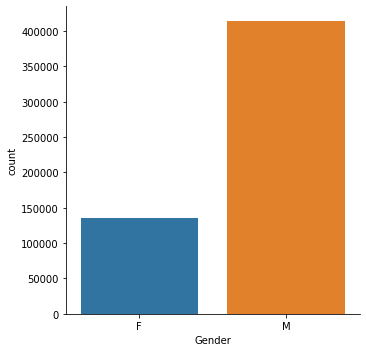

In [94]:
sns.factorplot('Gender',data=train,kind='count')

# Age 

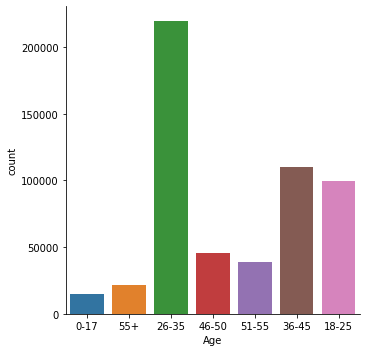

In [95]:
sns.factorplot('Age',data=train,kind='count')

# Occupation

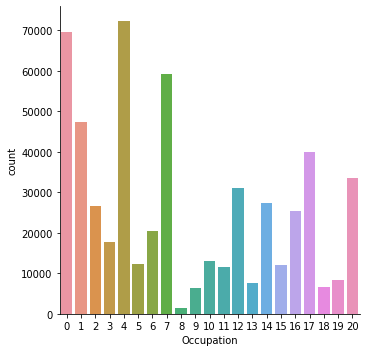

In [96]:
sns.factorplot('Occupation',data=train,kind='count')

# City_Category

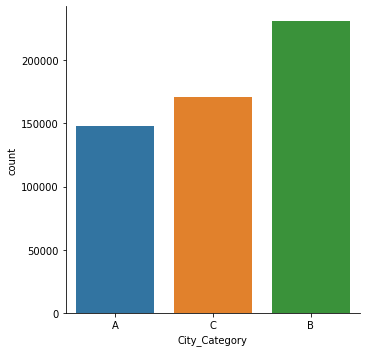

In [97]:
sns.factorplot('City_Category',data=train,kind='count')

# Stay in Current City Years

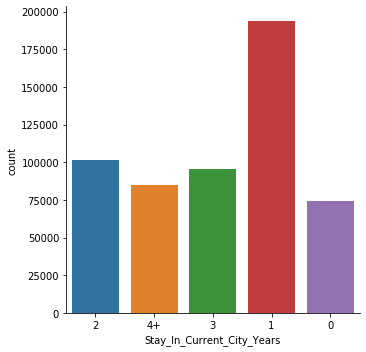

In [98]:
sns.factorplot('Stay_In_Current_City_Years',data=train,kind='count')

# Marital Status

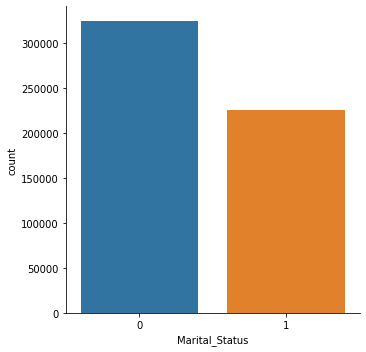

In [99]:
sns.factorplot('Marital_Status',data=train,kind='count')

# Product Category 1

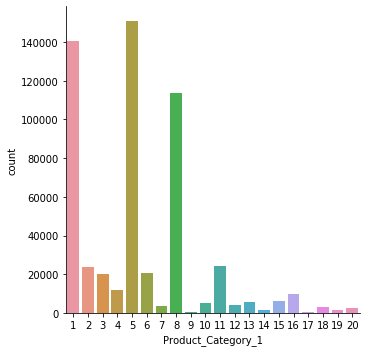

In [100]:
sns.factorplot('Product_Category_1',data=train,kind='count')

# Impute Product Category 2 in train and test

In [101]:
from sklearn.preprocessing import Imputer
numeric_columns = ['Product_Category_2']
numeric_columns

['Product_Category_2']

# Product Category 2

In [102]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [103]:
imp_train=train

In [104]:
imp_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [105]:
imp_train['Product_Category_2'] = imp_train['Product_Category_2'].astype(float)
imp_train['Product_Category_2'] = imp_train['Product_Category_2'].fillna(imp_train['Product_Category_2'].mean())

In [106]:
imp_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

Each User is having many products so the Unique id is combination of User Id and Product Id

In [107]:
imp_train.shape

(550068, 11)

In [108]:
imp_train_dup = imp_train[imp_train.duplicated(subset=['User_ID','Product_ID'], keep=False)]

print(imp_train_dup.shape)


(0, 11)


The number of observations is Zero in  train data frames. Hence, there are no duplicate observations in order to equate levels
There each User ID and Product ID is a Unique combination in predicting the Purchase price. Hence, we can drop these two 
from rest of our analysis

# Drop User ID and Product ID from train

In [109]:
imp_train.drop('User_ID',axis=1,inplace=True)
imp_train.drop('Product_ID',axis=1,inplace=True)

In [110]:
imp_train.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

# Convert Categorical to Dummies

In [111]:
cat_cols=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']

In [112]:
final_train=pd.get_dummies(imp_train,columns=cat_cols,drop_first=True)

In [113]:
print(final_train.shape)

(550068, 37)


# Split Train as Train and Validation in 70 30

In [114]:
X = final_train.copy().drop("Purchase",axis=1)
y = final_train["Purchase"]

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(385047, 36)
(165021, 36)
(385047,)
(165021,)


# Model Building

# Linear Regression 

In [117]:
from sklearn.linear_model import LinearRegression 

regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
#print(regr.score(X_train, y_train)) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(pred_train, y_train))
rmse_test = sqrt(mean_squared_error(pred_test,y_test))

print(rmse_train)
print(rmse_test)

4685.639942183607
4690.282204318516


Difference between training and validation is low. So, there is no Overfitting. 
Let's calculate predictions on entire test data using model built on train data

# Decision Tree Regressor

In [120]:
from sklearn import tree
# Defining the model
# Fit / train the model
dtc = tree.DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [121]:
pred_train = dtc.predict(X_train)
pred_test = dtc.predict(X_test)

In [122]:
rmse_train = sqrt(mean_squared_error(pred_train, y_train))
rmse_test = sqrt(mean_squared_error(pred_test,y_test))

print(rmse_train)
print(rmse_test)

2502.073573016424
3164.327921403872


# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X = X_train,y = y_train)

train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
rmse_train = sqrt(mean_squared_error(train_predictions, y_train))
rmse_test = sqrt(mean_squared_error(test_predictions,y_test))

print(rmse_train)
print(rmse_test)

2555.264685911165
3039.9820206224426
